In [33]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [34]:
f = open('data.txt','r')
edges = [line.strip('\n').split(' ') for line in f]
print(edges)

[['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'D'], ['C', 'E'], ['D', 'E'], ['B', 'E'], ['E', 'A']]


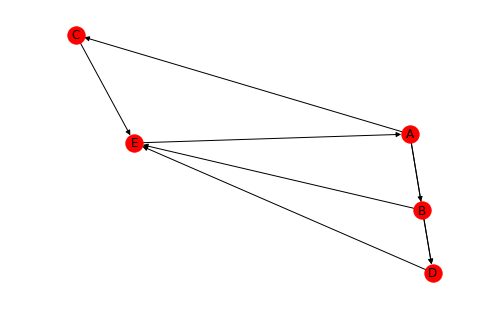

In [35]:
G = nx.DiGraph()
for edge in edges:
    G.add_edge(edge[0], edge[1])
nx.draw(G, with_labels=True)
plt.show()

In [36]:
nodes=[]
for edge in edges:
    if edge[0] not in nodes:
        nodes.append(edge[0])
    if edge[1] not in nodes:
        nodes.append(edge[1])
print(nodes)

['A', 'B', 'C', 'D', 'E']


In [37]:
N=len(nodes)
i=0
node_to_num={}
for node in nodes:
    node_to_num[node]=i
    i += 1
for edge in edges:
    edge[0]=node_to_num[edge[0]]
    edge[1]=node_to_num[edge[1]]
print(edges)
print(node_to_num)

[[0, 1], [0, 2], [0, 3], [1, 3], [2, 4], [3, 4], [1, 4], [4, 0]]
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}


In [38]:
s = np.zeros([N,N])
for edge in edges:
    s[edge[1], edge[0]] = 1
print(s)

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0.]]


In [39]:
for j in range(N):
    sum_of_col=sum(s[:,j])
    for i in range(N):
        s[i, j] /= sum_of_col
print(s)

[[0.         0.         0.         0.         1.        ]
 [0.33333333 0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.        ]
 [0.33333333 0.5        0.         0.         0.        ]
 [0.         0.5        1.         1.         0.        ]]


In [40]:
alpha = 0.8
A = alpha*s + (1-alpha)/N*np.ones([N,N])
print(A)

[[0.04       0.04       0.04       0.04       0.84      ]
 [0.30666667 0.04       0.04       0.04       0.04      ]
 [0.30666667 0.04       0.04       0.04       0.04      ]
 [0.30666667 0.44       0.04       0.04       0.04      ]
 [0.04       0.44       0.84       0.84       0.04      ]]


In [41]:
Pr = np.ones(N)/N
Pr1 = np.zeros(N)
e = 100000
k = 0
while e > 0.000001:
    Pr1 = np.dot(A, Pr)
    e = Pr1 - Pr
    e = max(map(abs, e))
    Pr = Pr1
    k += 1
    print('iteration %s'%str(k),Pr1)
    
print('final result:', Pr)

iteration 1 [0.2        0.09333333 0.09333333 0.17333333 0.44      ]
iteration 2 [0.392      0.09333333 0.09333333 0.13066667 0.29066667]
iteration 3 [0.27253333 0.14453333 0.14453333 0.18186667 0.25653333]
iteration 4 [0.24522667 0.11267556 0.11267556 0.17048889 0.35893333]
iteration 5 [0.32714667 0.10539378 0.10539378 0.150464   0.31160178]
iteration 6 [0.28928142 0.12723911 0.12723911 0.16939662 0.28684373]
iteration 7 [0.26947499 0.11714171 0.11714171 0.16803736 0.32820423]
iteration 8 [0.30256338 0.11186    0.11186    0.15871668 0.31499994]
iteration 9 [0.29199995 0.12068357 0.12068357 0.16542757 0.30120534]
iteration 10 [0.28096427 0.11786665 0.11786665 0.16614008 0.31716234]
iteration 11 [0.29372987 0.11492381 0.11492381 0.16207047 0.31435205]
iteration 12 [0.29148164 0.11832797 0.11832797 0.16429749 0.30756494]
iteration 13 [0.28605195 0.11772844 0.11772844 0.16505962 0.31343155]
iteration 14 [0.29074524 0.11628052 0.11628052 0.1633719  0.31332182]
iteration 15 [0.29065746 0.11